In [1]:
import aesara.tensor as at
import numpy as np
import scipy as sp

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl


### Data preparation

In [2]:
data_2d = np.full((100, 100), np.eye(100))
data_3d = np.full((200, 100, 100), np.eye(100))
data_4d = np.full((50, 100, 100, 100), np.eye(100))
data_5d = np.array([data_4d, data_4d])
data_6d = np.array([data_5d, data_5d])
data_7d = np.array([data_6d, data_6d])

### Calculating memory size of diff data

In [3]:
from sys import getsizeof

g = globals()
data = []

for i in range(2,8):
    data_name = 'data_{}d'.format(i)
    data_nd = g[data_name].ndim
    data_size = g[data_name].size
    data_MB = round(getsizeof(g[data_name]) / 1024 / 1024, 2)
    data.append([data_nd, data_size, data_MB])

In [4]:
import pandas as pd
df = pd.DataFrame(data, columns=['N-dims', 'Number of Elements', 'Memory Size(in MB)'])
df

,N-dims,Number of Elements,Memory Size(in MB)
0,2,10000,0.08
1,3,2000000,15.26
2,4,50000000,381.47
3,5,100000000,762.94
4,6,200000000,1525.88
5,7,400000000,3051.76


### Time for Aesara-Scipy with Vectorization

In [109]:
%%timeit
at.linalg.cholesky(data_3d)

518 µs ± 5.92 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Time for Aesara-Numpy implementation

In [102]:
%%timeit
at.linalg.cholesky_np(data_3d)

523 µs ± 6.85 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
import time

### Time for Numpy Cholesky Method

In [6]:
g = globals()
run_time = []

for i in range(2,8):
    data_name = 'data_{}d'.format(i)
    data = g[data_name]
    start = time.time()
    
    np.linalg.cholesky(data)

    end = time.time()
    run_time.append(round((end - start), 6))


df["Numpy_Runtime"] = run_time
df

,N-dims,Number of Elements,Memory Size(in MB),Numpy_Runtime
0,2,10000,0.08,0.132831
1,3,2000000,15.26,0.110059
2,4,50000000,381.47,4.926430
3,5,100000000,762.94,8.844711
4,6,200000000,1525.88,17.915647
5,7,400000000,3051.76,35.840367


### Time for Scipy Cholesky Method

In [7]:
g = globals()
run_time = []

vfunc = np.vectorize(sp.linalg.cholesky, excluded=['lower'], signature="(m,m)->(m,m)", otypes=[data_2d.dtype])

for i in range(2,8):
    data_name = 'data_{}d'.format(i)
    data = g[data_name]
    start = time.time()
    
    vfunc(data, lower=True)

    end = time.time()
    run_time.append(round((end - start), 6))


df["Scipy_Runtime"] = run_time
df

,N-dims,Number of Elements,Memory Size(in MB),Numpy_Runtime,Scipy_Runtime
0,2,10000,0.08,0.132831,0.039996
1,3,2000000,15.26,0.110059,0.156457
2,4,50000000,381.47,4.926430,3.963787
3,5,100000000,762.94,8.844711,8.312742
4,6,200000000,1525.88,17.915647,21.123423
5,7,400000000,3051.76,35.840367,43.743180


### Time for Aesara-Numpy implementation of Cholesky Method

In [8]:
g = globals()
run_time = []

for i in range(2,8):
    data_name = 'data_{}d'.format(i)
    data = g[data_name]
    start = time.time()
    
    at.linalg.cholesky_np(data)

    end = time.time()
    run_time.append(round((end - start), 6))


df["Aesara_Numpy_Runtime"] = run_time
df

,N-dims,Number of Elements,Memory Size(in MB),Numpy_Runtime,Scipy_Runtime,Aesara_Numpy_Runtime
0,2,10000,0.08,0.132831,0.039996,0.182514
1,3,2000000,15.26,0.110059,0.156457,0.000000
2,4,50000000,381.47,4.926430,3.963787,0.000000
3,5,100000000,762.94,8.844711,8.312742,0.015628
4,6,200000000,1525.88,17.915647,21.123423,0.000000
5,7,400000000,3051.76,35.840367,43.743180,0.000000


### Time for Aesara-Scipy Cholesky Method with vectorization

In [9]:
g = globals()
run_time = []

for i in range(2,8):
    data_name = 'data_{}d'.format(i)
    data = g[data_name]
    start = time.time()
    
    at.linalg.cholesky(data)

    end = time.time()
    run_time.append(round((end - start), 6))


df["Aesara_Scipy_Runtime"] = run_time
df

,N-dims,Number of Elements,Memory Size(in MB),Numpy_Runtime,Scipy_Runtime,Aesara_Numpy_Runtime,Aesara_Scipy_Runtime
0,2,10000,0.08,0.132831,0.039996,0.182514,0.0
1,3,2000000,15.26,0.110059,0.156457,0.000000,0.0
2,4,50000000,381.47,4.926430,3.963787,0.000000,0.0
3,5,100000000,762.94,8.844711,8.312742,0.015628,0.0
4,6,200000000,1525.88,17.915647,21.123423,0.000000,0.0
5,7,400000000,3051.76,35.840367,43.743180,0.000000,0.0


### Comparing output of Numpy and Aesara-Scipy cholesky method

In [10]:
g = globals()

for i in range(2,6):
    data_name = 'data_{}d'.format(i)
    data = g[data_name]
    
    print(data_name, " -> ", np.allclose(at.linalg.cholesky(data).eval(), np.linalg.cholesky(data)))

data_2d  ->  True
data_3d  ->  True
data_4d  ->  True
data_5d  ->  True


### Comparing output of Numpy and Aesara-Numpy cholesky method

In [12]:
g = globals()

for i in range(2,6):
    data_name = 'data_{}d'.format(i)
    data = g[data_name]
    
    print(data_name, " -> ", np.allclose(at.linalg.cholesky_np(data).eval(), np.linalg.cholesky(data)))

data_2d  ->  True
data_3d  ->  True
data_4d  ->  True
data_5d  ->  True


In [14]:
## Saving result to csv file
df.to_csv("cholesky_data.csv", index=False)

In [21]:
df

,N-dims,Number of Elements,Memory Size(in MB),Numpy_Runtime,Scipy_Runtime,Aesara_Numpy_Runtime,Aesara_Scipy_Runtime
0,2,10000,0.08,0.132831,0.039996,0.182514,0.0
1,3,2000000,15.26,0.110059,0.156457,0.000000,0.0
2,4,50000000,381.47,4.926430,3.963787,0.000000,0.0
3,5,100000000,762.94,8.844711,8.312742,0.015628,0.0
4,6,200000000,1525.88,17.915647,21.123423,0.000000,0.0
5,7,400000000,3051.76,35.840367,43.743180,0.000000,0.0


## Visualization

In [110]:
from matplotlib import pyplot as plt

#### Memory size of diff data

<BarContainer object of 6 artists>

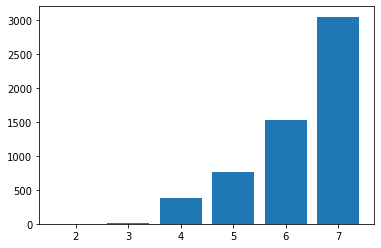

In [75]:
plt.bar(df["N-dims"], df["Memory Size(in MB)"])

### Runtime of diff methods

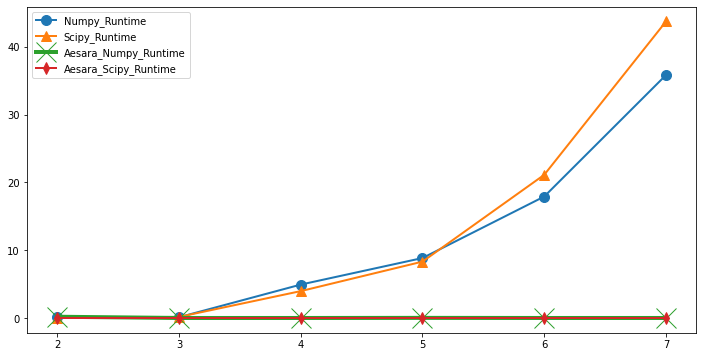

In [111]:
plt.figure(figsize=(12,6))

plt.plot(df["N-dims"], df["Numpy_Runtime"], lw = 2, marker = 'o', ms = 10, label = "Numpy_Runtime")
plt.plot(df["N-dims"], df["Scipy_Runtime"], lw = 2, marker = '^', ms = 10, label = "Scipy_Runtime")
plt.plot(df["N-dims"], df["Aesara_Numpy_Runtime"], lw = 4, marker = 'x', ms = 20, label = "Aesara_Numpy_Runtime")
plt.plot(df["N-dims"], df["Aesara_Scipy_Runtime"], lw = 2, marker = 'd', ms = 8, label = "Aesara_Scipy_Runtime")
plt.legend()